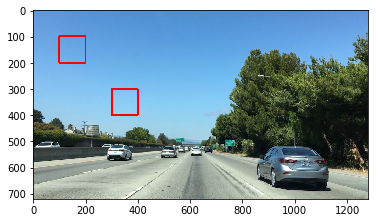

In [29]:
# importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import statistics
import os
%matplotlib inline
#%matplotlib notebook"

def imshow_full_size(img, title=False, *args, **kwargs):
    dpi = 100
    margin = 0.05 # (5% of the width/height of the figure...)
    ypixels, xpixels = img.shape[0], img.shape[1]
    
    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * xpixels / dpi, (1 + margin) * ypixels / dpi
    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.imshow(img, interpolation='none', *args, **kwargs)
    if title:
        plt.title(title)
    plt.show()

image = mpimg.imread('lesson_stuff/bbox-example-image.jpg')

# Define a function that takes an image, a list of bounding boxes, 
# and optional color tuple and line thickness as inputs
# then draws boxes in that color on the output

def draw_boxes(img, bboxes, color=(255, 0, 0), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)

    for box in bboxes:
        cv2.rectangle(draw_img, box[0], box[1], color, thick)
    
    return draw_img

# Add bounding boxes in this format, these are just example coordinates.
bboxes = [((100, 100), (200, 200)), ((300, 300), (400, 400))]

result = draw_boxes(image, bboxes)
plt.imshow(result)

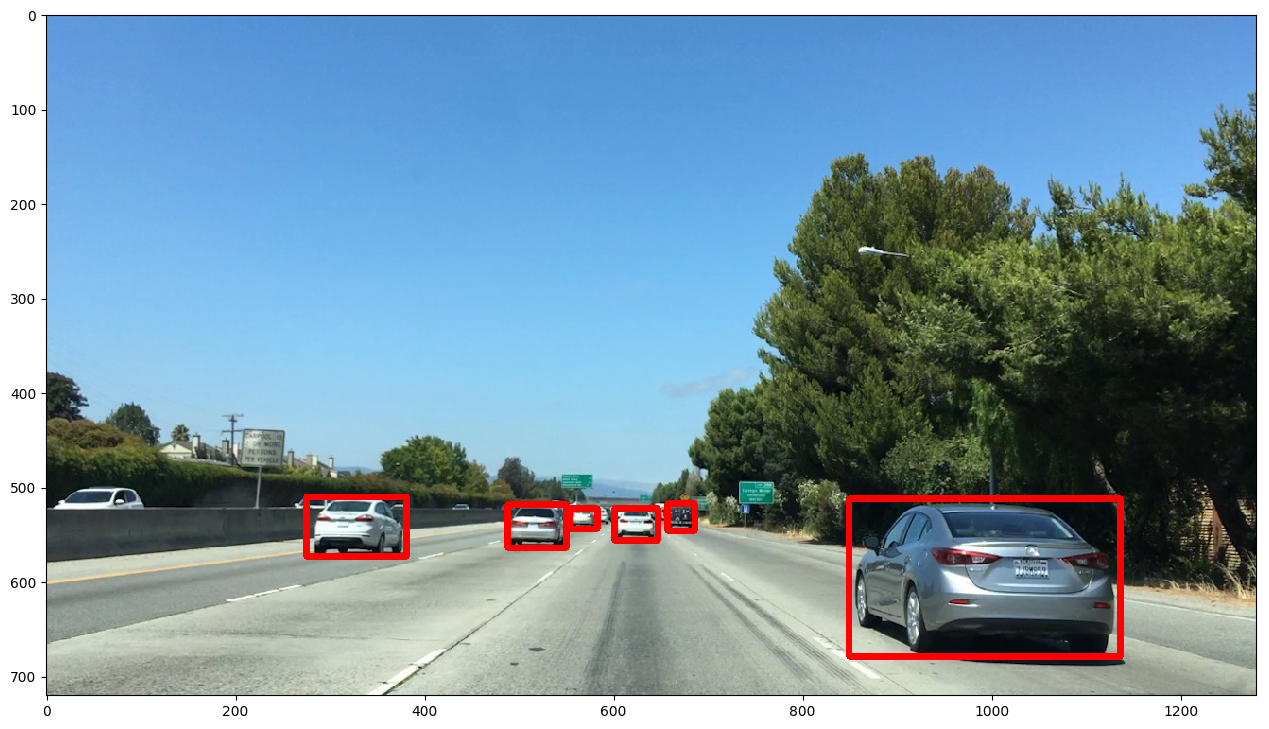

In [41]:
image = mpimg.imread('lesson_stuff/bbox-example-image.jpg')
#image = mpimg.imread('lesson_stuff/temp-matching-example-2.jpg')
templist = ['cutout1.jpg', 'cutout2.jpg', 'cutout3.jpg',
            'cutout4.jpg', 'cutout5.jpg', 'cutout6.jpg']
templist = ["lesson_stuff/" + x for x in templist]

# Define a function that takes an image and a list of templates as inputs
# then searches the image and returns the a list of bounding boxes 
# for matched templates
def find_matches(img, template_list):
    # Define an empty list to take bbox coords
    bbox_list = []
    
    draw_img = np.copy(img)
    
    # All the 6 methods for comparison in a list:
    # They all work equally well except for cv2.TM_CCORR, which is terrible.
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
               'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    methods = ['cv2.TM_CCOEFF']
    # Iterate through template list
    # Read in templates one by one
    for template_file in template_list:
        template_img = mpimg.imread(template_file)
        #plt.imshow(template_img)
        #plt.figure()
        w = template_img.shape[1]
        h = template_img.shape[0]
        #print(template_img.shape)
        
        #junk_img = np.copy(img)
        
        for method in methods:
            #print(method)
            method = eval(method)
            # Use cv2.matchTemplate() to search the image
            # using whichever of the OpenCV search methods you prefer
            res = cv2.matchTemplate(draw_img, template_img, method)
                
            # Use cv2.minMaxLoc() to extract the location of the best match           
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

            # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
            if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
                top_left = min_loc
            else:
                top_left = max_loc
                
            # Determine bounding box corners for the match
            bottom_right = (top_left[0] + w, top_left[1] + h)
                        
            #cv2.rectangle(junk_img,top_left, bottom_right, (255,0,0), 2)
        
            bbox_list.append((top_left, bottom_right))

    # Return the list of bounding boxes
    return bbox_list

bboxes = find_matches(image, templist)
result = draw_boxes(image, bboxes)
imshow_full_size(result)

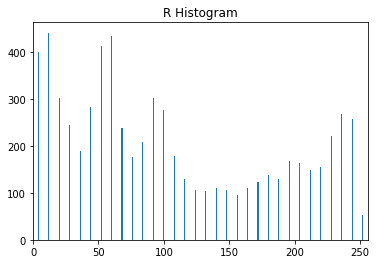

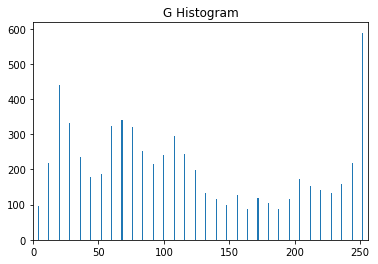

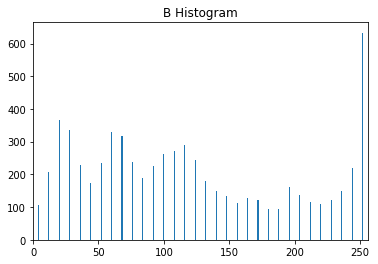

In [50]:
image = mpimg.imread('lesson_stuff/cutout1.jpg')

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(image[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(image[:,:,2], bins=nbins, range=bins_range)
    
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

# Plot a figure with all three bar charts
if rh is not None:
    #fig = plt.figure(figsize=(12,3))
    #plt.subplot(131)
    plt.figure()
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    #plt.subplot(132)
    plt.figure()
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    #plt.subplot(133)
    plt.figure()
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    #fig.tight_layout()
else:
    print('Your function is returning None for at least one variable...')

In [54]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

# Read a color image
img = cv2.imread("000275.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()


None


AttributeError: 'NoneType' object has no attribute 'shape'